In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [3]:
x = np.arange(-40,60)
y = f(x)


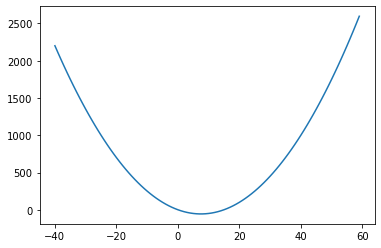

In [4]:
plt.plot(x,y)

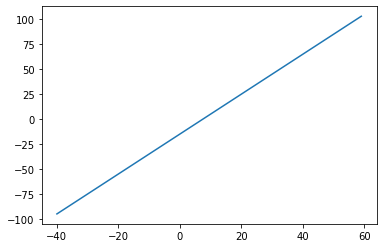

In [5]:
yd = Df(x)
plt.plot(x,yd)

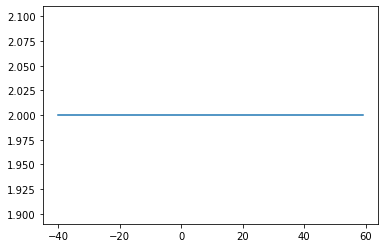

In [6]:
ydd = DDf(x)
# note plot constant function
plt.plot(x,np.full(x.shape, ydd))

In [7]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1

In [8]:
def batch(x0 , e , a , mx):
    epoch = mx 
    alpha = a
    epsillon = e 
    
    for i in range(epoch):
        # cost  is f 
        f = lambda x: x**2 - 15*x +1
        # gradiant is Df
        Df = lambda x: 2*x -15
        g0 = Df(x0)
        x0 = x0 - alpha * g0
        if (g0 < epsillon):
            print("s with x0 =40, lr=0.01, epsilon=0.1\n")
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",x0)
            print("Gradient =  ",g0)
            break 
            
    

In [9]:
alpha = 0.01
x0=40
mx = 500
epsilon = 0.1
batch(x0 , epsilon ,alpha , mx )

s with x0 =40, lr=0.01, epsilon=0.1

Found solution after  321  iterations.

x_min =  7.548604864188269
Gradient =   0.09919360038422198


In [10]:
# Newton's method without learning rate, x0=40, epsilon = 0.1

In [11]:
def newton(x0 , e ,mx ,a = 1 ):
    epoch = mx 
    alpha = a
    epsillon = e 
    
    for i in range(epoch):
        # cost  is f 
        f = lambda x: x**2 - 15*x +1
        # gradiant is Df
        Df = lambda x: 2*x -15
        # second gradiant is DDf
        DDf = lambda x: 2
        g0 = Df(x0) / DDf(x0)
        x0 = x0 - alpha * g0
        if (g0 < epsillon):
            print("Newton Results  with x0 =40,  epsilon=0.1\n")
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",x0)
            print("Gradient =  ",g0)
            break 
    


In [12]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
# hint alpha = 1
x0=40
mx = 500
epsilon = 0.1
newton(x0 , epsilon ,mx )

Newton Results  with x0 =40,  epsilon=0.1

Found solution after  1  iterations.

x_min =  7.5
Gradient =   0.0


In [13]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
alpha = 0.8
x0 = 40 
epsilon = 0.1
mx = 500
newton(x0 , epsilon ,mx ,alpha)

Newton Results  with x0 =40,  epsilon=0.1

Found solution after  4  iterations.

x_min =  7.5104
Gradient =   0.0519999999999996


##Multi Variable


In [14]:
#Implement the Gradient decent and Newton's method as a function 
#and find the minimum of the following function:
#$𝒇(𝒙)=𝒙^𝟐+y^2$
#- $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
#- $𝒇(𝒙)=𝒙^𝟐y$ 

In [15]:
from sympy import *
from sympy.plotting import plot3d

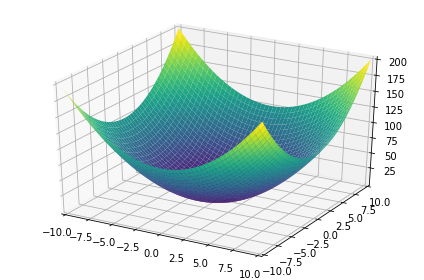

In [16]:
# first function
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

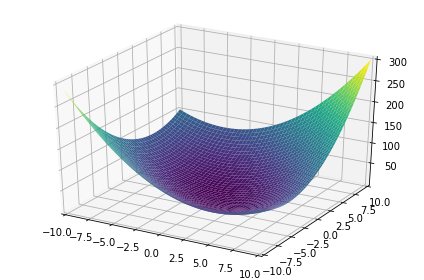

In [17]:
# second function
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

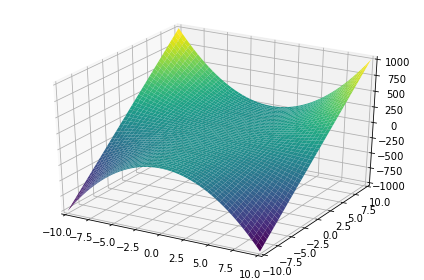

In [18]:
# third function
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [40]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [41]:
def multi_batch(DF,x0 , e , mx , a):
    epoch = mx 
    alpha = a
    epsillon = e 
    
    for i in range(epoch):
       
        g0 = DF(x0)
        x0 = x0 - alpha * g0
        if (np.linalg.norm(g0) < epsillon):
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",x0)
            print("Gradient =  ",g0)
            break 

In [42]:
#?
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
x0 = [10,10]
epsilon = 0.001
alpha = 0.1
mx = 500
multi_batch(Df_1,x0 , epsilon , mx , alpha)

Found solution after  46  iterations.

x_min =  [0.00027876 0.00027876]
Gradient =   [0.0006969 0.0006969]


In [43]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x0 = [10,10]
epsilon = 0.001
alpha = 0.5
mx = 500
multi_batch(Df_1,x0 , epsilon , mx , alpha)

Found solution after  1  iterations.

x_min =  [0. 0.]
Gradient =   [0. 0.]


In [44]:
def multi_newton( DF,DDF,x0 , e ,mx ,a = 1 ):
    epoch = mx 
    alpha = a
    epsilon = e 
    
    for i in range(epoch):
        
        g0 =  np.linalg.inv(DDF(x0)) @ DF(x0) 
        x0 = x0 - alpha * g0
        if (np.linalg.norm(g0) < epsilon):
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",x0)
            print("Gradient =  ",g0)
            break 
    


In [45]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                     [0,2]])


x0 = [10,10]
epsilon = 0.001
alpha = 0.1
mx = 500
multi_newton(Df_1,DDf_1,x0 , epsilon ,mx)

Found solution after  1  iterations.

x_min =  [0. 0.]
Gradient =   [0. 0.]


In [46]:
 #First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001

x0 = [10,10]
epsilon = 0.001
alpha = 0.5
mx = 500
multi_newton(Df_1,DDf_1,x0 , epsilon ,mx,alpha)

Found solution after  14  iterations.

x_min =  [0.00030518 0.00030518]
Gradient =   [0.00061035 0.00061035]


In [26]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [27]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x0 =[10,10]
epsilon = 0.001
alpha = 0.5
mx = 500
multi_batch(Df_2,x0 , epsilon , mx , alpha)

Found solution after  16  iterations.

x_min =  [-7.62939453e-05 -7.62939453e-05]
Gradient =   [0.00045776 0.00045776]


In [28]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x0 = [10,10]
epsilon = 0.001
alpha = 0.5
mx = 500
multi_newton(Df_2,DDf_2,x0 , epsilon ,mx)

Found solution after  1  iterations.

x_min =  [0. 0.]
Gradient =   [0. 0.]


In [29]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001
x0 = [10,10]
epsilon = 0.001
alpha = 0.9
mx = 500
multi_newton(Df_2,DDf_2,x0 , epsilon ,mx,alpha )

Found solution after  5  iterations.

x_min =  [1.e-05 1.e-05]
Gradient =   [1.e-04 1.e-04]


In [30]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [31]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001
x0 =[10,10]
epsilon = 0.001
alpha = 0.01
mx = 500
multi_batch(Df_5,x0 , epsilon , mx , alpha)

Found solution after  79  iterations.

x_min =  [5.87348108e-05 6.85061189e+00]
Gradient =   [9.32503127e-04 4.63214210e-09]


In [47]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x0 = [10,10]
epsilon = 0.001
mx = 500
multi_newton(Df_5,DDf_5,x0 , epsilon ,mx)

Found solution after  13  iterations.

x_min =  [0.00061035 0.00061035]
Gradient =   [0.00061035 0.00061035]


#<h1>BFGS</h1>

In [37]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [38]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [39]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [74]:
def bfgs (DF,xn_1 , xn , e ,mx, a = 1):
    epoch = mx 
    alpha = a
    epsilon = e 
    identity = np.eye(xn.shape[0])
    # initailize B_inverse
    B_inv = identity
    for i in range(epoch):
        Delta_X = (xn - xn_1).reshape(-1,1)
        Delta_y = (DF(xn) - DF(xn_1)).reshape(-1,1)
        print("xn_1:  " ,xn_1)
        print(" xn : ",xn )
        print(" Dfxn_1:  ",DF(xn_1) )
        print(" Dfxn :  ", DF(xn) )
        
 
        B_inv = (identity - ((Delta_X@ Delta_y.T) / (Delta_y.T @ Delta_X ))) @ B_inv @ (identity -((Delta_y @ Delta_X.T) / (Delta_y.T @ Delta_X)))  +((Delta_X @ Delta_X.T)/(Delta_y.T @ Delta_X))
        print("B_inv ",B_inv)
        xn_1 = xn
        g0 =  B_inv @ DF(xn)
        print(" g0 : " ,g0)
        xn = xn - alpha * g0
        if (np.linalg.norm(g0) < epsilon):
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",xn)
            print("Gradient =  ",g0)
            break 

In [76]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xn_1 = np.array([10,10])
xn = np.array([9,9])
epsilon = 0.001
mx = 500
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])
bfgs (Df_1,xn_1 , xn , epsilon  ,mx)

xn_1:   [10 10]
 xn :  [9 9]
 Dfxn_1:   [20 20]
 Dfxn :   [18 18]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [9. 9.]
xn_1:   [9 9]
 xn :  [0. 0.]
 Dfxn_1:   [18 18]
 Dfxn :   [0. 0.]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [0. 0.]
Found solution after  1  iterations.

x_min =  [0. 0.]
Gradient =   [0. 0.]


In [77]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
xn_1 = np.array([10,10])
xn = np.array([9,9])
epsilon = 0.001
alpha = 0.9
mx = 500
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])
bfgs (Df_1,xn_1 , xn , epsilon  ,mx,alpha)

xn_1:   [10 10]
 xn :  [9 9]
 Dfxn_1:   [20 20]
 Dfxn :   [18 18]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [9. 9.]
xn_1:   [9 9]
 xn :  [0.9 0.9]
 Dfxn_1:   [18 18]
 Dfxn :   [1.8 1.8]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [0.9 0.9]
xn_1:   [0.9 0.9]
 xn :  [0.09 0.09]
 Dfxn_1:   [1.8 1.8]
 Dfxn :   [0.18 0.18]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [0.09 0.09]
xn_1:   [0.09 0.09]
 xn :  [0.009 0.009]
 Dfxn_1:   [0.18 0.18]
 Dfxn :   [0.018 0.018]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [0.009 0.009]
xn_1:   [0.009 0.009]
 xn :  [0.0009 0.0009]
 Dfxn_1:   [0.018 0.018]
 Dfxn :   [0.0018 0.0018]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [0.0009 0.0009]
xn_1:   [0.0009 0.0009]
 xn :  [9.e-05 9.e-05]
 Dfxn_1:   [0.0018 0.0018]
 Dfxn :   [0.00018 0.00018]
B_inv  [[ 0.75 -0.25]
 [-0.25  0.75]]
 g0 :  [9.e-05 9.e-05]
Found solution after  5  iterations.

x_min =  [9.e-06 9.e-06]
Gradient =   [9.e-05 9.e-05]


In [78]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xn_1 = np.array([10,10])
xn = np.array([9,9])
epsilon = 0.001
#alpha = 0.9
mx = 500
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])

bfgs (Df_2,xn_1 , xn , epsilon  ,mx)

xn_1:   [10 10]
 xn :  [9 9]
 Dfxn_1:   [30 30]
 Dfxn :   [27 27]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [9. 9.]
xn_1:   [9 9]
 xn :  [3.55271368e-15 1.77635684e-15]
 Dfxn_1:   [27 27]
 Dfxn :   [8.88178420e-15 7.10542736e-15]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [3.55271368e-15 1.77635684e-15]
Found solution after  1  iterations.

x_min =  [ 0.00000000e+00 -1.18329136e-30]
Gradient =   [3.55271368e-15 1.77635684e-15]


In [79]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
xn_1 = np.array([10,10])
xn = np.array([9,9])
epsilon = 0.001
alpha = 0.9
mx = 500
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])

bfgs (Df_2,xn_1 , xn , epsilon  ,mx ,alpha)

xn_1:   [10 10]
 xn :  [9 9]
 Dfxn_1:   [30 30]
 Dfxn :   [27 27]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [9. 9.]
xn_1:   [9 9]
 xn :  [0.9 0.9]
 Dfxn_1:   [27 27]
 Dfxn :   [2.7 2.7]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [0.9 0.9]
xn_1:   [0.9 0.9]
 xn :  [0.09 0.09]
 Dfxn_1:   [2.7 2.7]
 Dfxn :   [0.27 0.27]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [0.09 0.09]
xn_1:   [0.09 0.09]
 xn :  [0.009 0.009]
 Dfxn_1:   [0.27 0.27]
 Dfxn :   [0.027 0.027]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [0.009 0.009]
xn_1:   [0.009 0.009]
 xn :  [0.0009 0.0009]
 Dfxn_1:   [0.027 0.027]
 Dfxn :   [0.0027 0.0027]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [0.0009 0.0009]
xn_1:   [0.0009 0.0009]
 xn :  [9.e-05 9.e-05]
 Dfxn_1:   [0.0027 0.0027]
 Dfxn :   [0.00027 0.00027]
B_inv  [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
 g0 :  [9.e-05 9.e-05]
Found so

In [81]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xn_1 = np.array([10,10])
xn = np.array([9,9])
epsilon = 0.001
mx = 500
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])

bfgs (Df_5,xn_1 , xn , epsilon  ,mx )

xn_1:   [10 10]
 xn :  [9 9]
 Dfxn_1:   [200 100]
 Dfxn :   [162  81]
B_inv  [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
 g0 :  [4.26315789 4.26315789]
xn_1:   [9 9]
 xn :  [4.73684211 4.73684211]
 Dfxn_1:   [162  81]
 Dfxn :   [44.87534626 22.43767313]
B_inv  [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
 g0 :  [1.63339383 1.63339383]
xn_1:   [4.73684211 4.73684211]
 xn :  [3.10344828 3.10344828]
 Dfxn_1:   [44.87534626 22.43767313]
 Dfxn :   [19.2627824  9.6313912]
B_inv  [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
 g0 :  [1.22844828 1.22844828]
xn_1:   [3.10344828 3.10344828]
 xn :  [1.875 1.875]
 Dfxn_1:   [19.2627824  9.6313912]
 Dfxn :   [7.03125  3.515625]
B_inv  [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
 g0 :  [0.70616883 0.70616883]
xn_1:   [1.875 1.875]
 xn :  [1.16883117 1.16883117]
 Dfxn_1:   [7.03125  3.515625]
 Dfxn :   [2.7323326 1.3661663]
B_inv  [[ 0.33173333 -0.33493333]
 [-0.33493333  0.9984    ]]
 g0 :  [0.44883117 0.44883